# Python e API

### O que é uma API?

- É um conjunto de códigos para usar um serviço/site/aplicativo específico. Cada site/ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar

- Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar

- As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API

- A Documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API 

#### Pegar a Cotação Atual de Todas as Moedas 

In [6]:
import requests
import json
cotacoes = requests.get('https://economia.awesomeapi.com.br/json/all')
cotacoes_dic = cotacoes.json()
print(cotacoes_dic)

{'USD': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '4.9839', 'low': '4.9285', 'varBid': '-0.0461', 'pctChange': '-0.92', 'bid': '4.9335', 'ask': '4.9342', 'timestamp': '1709070620', 'create_date': '2024-02-27 18:50:20'}, 'USDT': {'code': 'USD', 'codein': 'BRLT', 'name': 'Dólar Americano/Real Brasileiro Turismo', 'high': '5.005', 'low': '4.955', 'varBid': '-0.045', 'pctChange': '-0.9', 'bid': '4.81', 'ask': '5.11', 'timestamp': '1709060220', 'create_date': '2024-02-27 15:57:00'}, 'CAD': {'code': 'CAD', 'codein': 'BRL', 'name': 'Dólar Canadense/Real Brasileiro', 'high': '3.698', 'low': '3.6455', 'varBid': '-0.0398', 'pctChange': '-1.08', 'bid': '3.6438', 'ask': '3.6492', 'timestamp': '1709070615', 'create_date': '2024-02-27 18:50:15'}, 'GBP': {'code': 'GBP', 'codein': 'BRL', 'name': 'Libra Esterlina/Real Brasileiro', 'high': '6.3219', 'low': '6.2539', 'varBid': '-0.0601', 'pctChange': '-0.95', 'bid': '6.25', 'ask': '6.2657', 'timestamp': '17090706

#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [10]:
print('Dólar: {} USD'.format(cotacoes_dic['USD']['bid']))
print('Euro: {} EUR'.format(cotacoes_dic['EUR']['bid']))
print('Bitcoin: {} BTC'.format(cotacoes_dic['BTC']['bid']))

Dólar: 4.9335 USD
Euro: 5.346 EUR
Bitcoin: 282173 BTC


#### Pegar a cotação dos últimos 30 dias do dólar (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [37]:
import requests
import json
from datetime import datetime

cotacoes_dolar_30d = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30')
cotacoes_dolar_30d_dic = cotacoes_dolar_30d.json()



# Função para converter o timestamp em formato de data legível
def timestamp_para_data(timestamp):
    return datetime.fromtimestamp(int(timestamp)).strftime('%Y-%m-%d %H:%M:%S')

# List comprehension para extrair a data e o valor do 'bid' e formatá-los
lista_cotacoes_dolar = [(timestamp_para_data(item['timestamp']), float(item['bid'])) for item in cotacoes_dolar_30d_dic]

# Imprimindo a lista formatada do último item para o primeiro
for data, valor in reversed(lista_cotacoes_dolar):
    print(f'Data: {data}, Valor do Bid: {valor}')


Data: 2024-01-24 18:30:01, Valor do Bid: 4.9335
Data: 2024-01-25 18:30:01, Valor do Bid: 4.9165
Data: 2024-01-26 18:29:38, Valor do Bid: 4.917
Data: 2024-01-26 18:30:01, Valor do Bid: 4.9168
Data: 2024-01-29 18:30:02, Valor do Bid: 4.9518
Data: 2024-01-30 19:30:04, Valor do Bid: 4.9496
Data: 2024-01-31 18:30:00, Valor do Bid: 4.9526
Data: 2024-02-01 19:12:03, Valor do Bid: 4.9163
Data: 2024-02-02 18:29:40, Valor do Bid: 4.9713
Data: 2024-02-05 18:30:02, Valor do Bid: 4.9854
Data: 2024-02-06 18:30:01, Valor do Bid: 4.9634
Data: 2024-02-07 19:30:04, Valor do Bid: 4.9712
Data: 2024-02-08 18:30:01, Valor do Bid: 4.992
Data: 2024-02-09 18:29:55, Valor do Bid: 4.9512
Data: 2024-02-09 18:30:01, Valor do Bid: 4.9517
Data: 2024-02-11 20:59:20, Valor do Bid: 4.9536
Data: 2024-02-12 20:59:20, Valor do Bid: 4.9536
Data: 2024-02-13 20:58:40, Valor do Bid: 4.9536
Data: 2024-02-14 19:30:03, Valor do Bid: 4.9735
Data: 2024-02-15 19:14:05, Valor do Bid: 4.9732
Data: 2024-02-16 18:29:22, Valor do Bid: 4

#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [13]:
import requests
import json
from datetime import datetime

def timestamp_para_data(timestamp):
    return datetime.fromtimestamp(int(timestamp)).strftime('%Y-%m-%d %H:%M:%S')


bitcoin_jan_out = requests.get('https://economia.awesomeapi.com.br/json/daily/BTC-BRL/200?start_date=20200101&end_date=20201031')
bitcoin_jan_out_dic = bitcoin_jan_out.json()

bitcoin_jan_out_exp = [(timestamp_para_data(item['timestamp']), float(item['bid'])) for item in bitcoin_jan_out_dic]

test = [float(item['bid']) for item in bitcoin_jan_out_dic]
test.reverse()

print(test)
# Imprimindo a lista formatada do último item para o primeiro
for data, valor in reversed(bitcoin_jan_out_exp):
    print(f'Data: {data}, Valor do Bid: {valor}')






[35150.0, 37025.0, 36836.7, 37415.0, 37158.0, 36652.1, 36800.0, 38000.1, 40050.0, 41050.0, 41212.0, 41715.0, 43392.0, 43070.0, 46424.7, 46610.0, 47626.0, 47900.0, 48553.0, 48852.0, 49700.0, 52500.0, 57700.0, 52609.1, 52499.0, 49225.0, 49700.0, 51488.8, 54450.0, 56208.0, 53609.0, 54207.4, 55300.0, 55651.1, 55760.8, 54831.8, 51440.0, 51400.0, 51600.0, 49560.0, 49735.0, 47625.1, 49000.2, 51700.3, 50650.0, 51500.0, 50865.1, 53600.0, 54001.0, 49500.4, 50400.6, 48800.4, 48820.6, 49133.5, 48096.8, 48201.0, 49350.0, 47000.0, 48100.1, 47788.9, 47750.0, 48501.4, 49679.0, 49290.6, 50405.0, 49700.0, 49750.0, 49782.0, 50710.0, 49759.1, 49800.0, 49755.0, 49915.1, 49678.2, 49746.8, 49840.0, 49960.0, 49800.0, 49208.8, 48815.5, 48993.1, 48850.0, 49890.0, 49900.1, 50360.1, 49890.0, 49905.9, 49750.0, 49920.0, 50041.3, 50073.4, 49868.0, 49320.0, 49702.1, 49651.8, 49680.0, 49516.5, 49143.0, 49321.0, 49850.0, 49951.1, 50400.2, 50402.0, 55300.0, 56161.0, 57490.0, 57330.0, 58950.0, 61298.1, 58296.3, 59800.0, 

#### Gráfico com as cotações do BitCoin

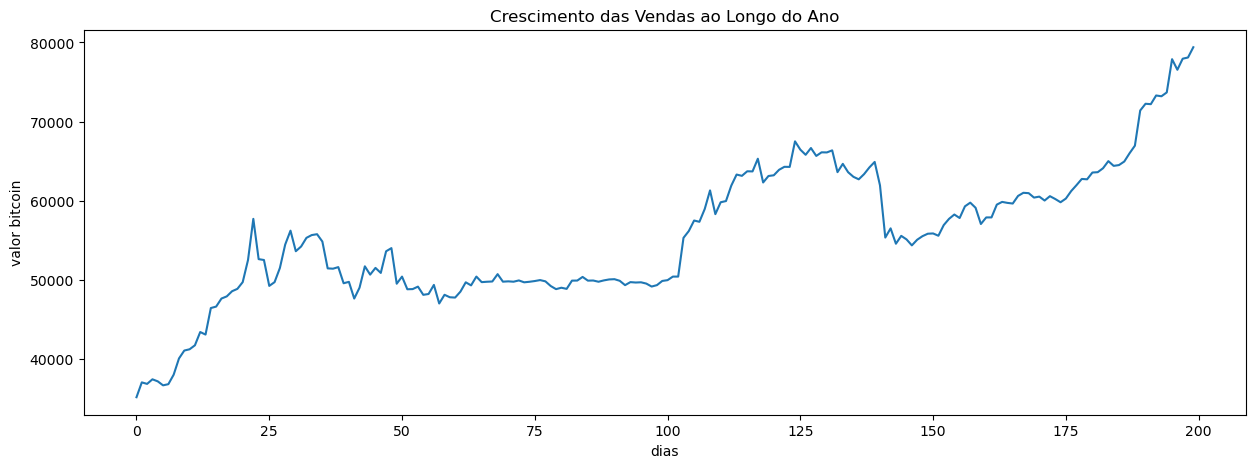

In [15]:
import matplotlib.pyplot as plt
from numpy import arange

plt.figure(figsize=(15, 5))
plt.plot(test)
plt.xlabel('dias')
plt.ylabel('valor bitcoin')
plt.title('Crescimento das Vendas ao Longo do Ano')
plt.show()